In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [2]:
df = pd.read_csv('Default.csv', index_col=0)

In [3]:
df

default student      balance        income
1          No      No   729.526495  44361.625074
2          No     Yes   817.180407  12106.134700
3          No      No  1073.549164  31767.138947
4          No      No   529.250605  35704.493935
5          No      No   785.655883  38463.495879
...       ...     ...          ...           ...
9996       No      No   711.555020  52992.378914
9997       No      No   757.962918  19660.721768
9998       No      No   845.411989  58636.156984
9999       No      No  1569.009053  36669.112365
10000      No     Yes   200.922183  16862.952321

[10000 rows x 4 columns]

In [4]:
df.iloc[:,1:]

student      balance        income
1          No   729.526495  44361.625074
2         Yes   817.180407  12106.134700
3          No  1073.549164  31767.138947
4          No   529.250605  35704.493935
5          No   785.655883  38463.495879
...       ...          ...           ...
9996       No   711.555020  52992.378914
9997       No   757.962918  19660.721768
9998       No   845.411989  58636.156984
9999       No  1569.009053  36669.112365
10000     Yes   200.922183  16862.952321

[10000 rows x 3 columns]

In [5]:
df.student = df.student.map(dict(Yes=1, No=0))

In [6]:
#df[df.default.isna()]
df

default  student      balance        income
1          No        0   729.526495  44361.625074
2          No        1   817.180407  12106.134700
3          No        0  1073.549164  31767.138947
4          No        0   529.250605  35704.493935
5          No        0   785.655883  38463.495879
...       ...      ...          ...           ...
9996       No        0   711.555020  52992.378914
9997       No        0   757.962918  19660.721768
9998       No        0   845.411989  58636.156984
9999       No        0  1569.009053  36669.112365
10000      No        1   200.922183  16862.952321

[10000 rows x 4 columns]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.default, test_size=.2, random_state = 1)

In [8]:
len(X_train)

8000

In [9]:
len(X_test)

2000

## Explore your data

<Axes: xlabel='income', ylabel='Count'>

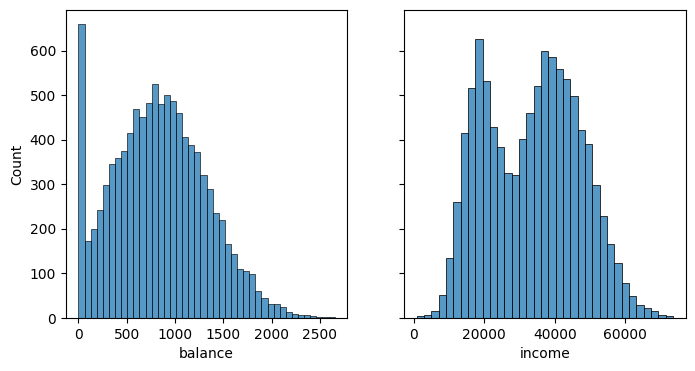

In [10]:
f, ax = plt.subplots(1, 2, figsize = (8,4), sharey= True)
sns.histplot(df.balance,ax = ax[0])
sns.histplot(df.income, ax= ax[1])

<Axes: xlabel='student', ylabel='balance'>

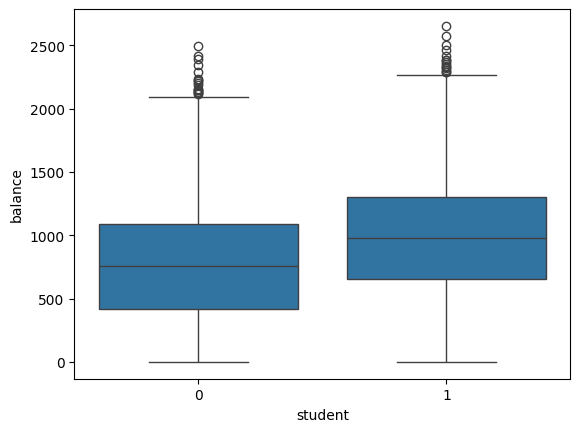

In [21]:
sns.boxplot(x=df.student, y=df.balance)

<Axes: xlabel='default', ylabel='income'>

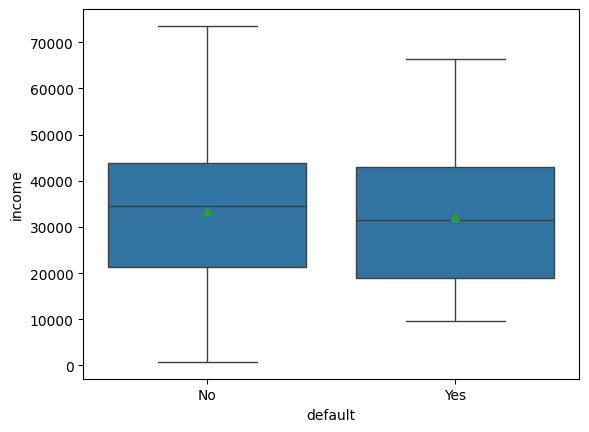

In [19]:
sns.boxplot(x=df.default, y=df.income, showmeans=True)

<Axes: xlabel='balance', ylabel='default'>

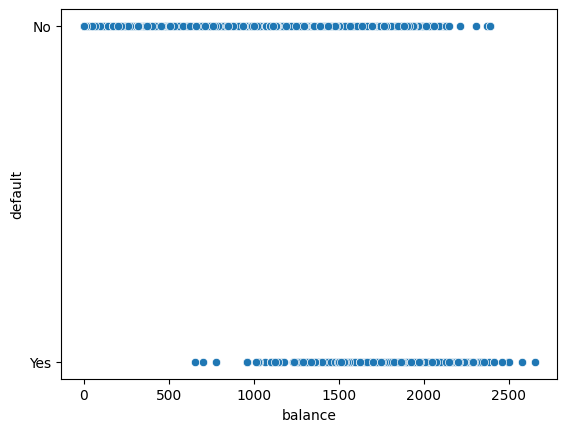

In [13]:
sns.scatterplot(x = df.balance, y = df.default )

<Axes: xlabel='balance', ylabel='income'>

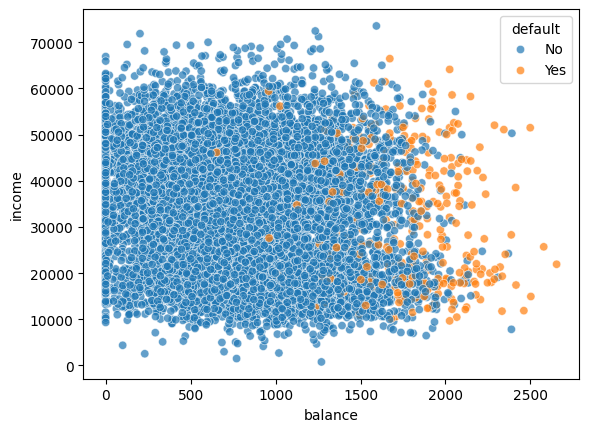

In [14]:
sns.scatterplot(x = df.balance, y = df.income, hue = df.default,alpha = .7 )

In [15]:
X_train.iloc[:,1:]

balance        income
2695  1804.036475  31318.296026
5141  1174.194909  35533.484519
2569   978.652180  25742.119731
3672   548.136289  19501.341068
7428   270.072593  36833.645138
...           ...           ...
2896  1270.092810  16809.006452
7814  1598.020831  39163.361056
906   1234.476479  31313.374575
5193     0.000000  29322.631394
236    964.820253  34390.746035

[8000 rows x 2 columns]

In [16]:
lda = QuadraticDiscriminantAnalysis()
lda.fit(X_train.iloc[:,1:],y_train)
y_pred_lda = lda.predict(X_test.iloc[:,1:])
con_mat_lda = confusion_matrix(y_test, y_pred_lda)
print(con_mat_lda)

[[1932    9]
 [  43   16]]


In [24]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train.iloc[:,1:],y_train)

LinearDiscriminantAnalysis()

In [25]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train.iloc[:,1:],y_train)

QuadraticDiscriminantAnalysis()

In [28]:
lda.decision_function

<bound method LinearDiscriminantAnalysis.decision_function of LinearDiscriminantAnalysis()>

In [31]:
y_pred = qda.predict(X_test.iloc[:,1:])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(qda.score(X_test.iloc[:,1:], y_test)))

Accuracy of logistic regression classifier on test set: 0.97


In [32]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1941
         Yes       0.64      0.27      0.38        59

    accuracy                           0.97      2000
   macro avg       0.81      0.63      0.68      2000
weighted avg       0.97      0.97      0.97      2000



In [38]:
y_pred = lda.predict(X_test.iloc[:,1:])
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lda.score(X_test.iloc[:,1:], y_test)))

Accuracy of logistic regression classifier on test set: 0.98


In [44]:
lda.predict_proba(

TypeError: LinearDiscriminantAnalysis.predict_proba() missing 1 required positional argument: 'X'

In [46]:
y_pred_new_threshold = pd.Series(lda.predict_proba(X_test.iloc[:,1:])[:,1]>=0.6) #(lda.predict_proba(X_test.iloc[:,1:])[:,1]>=0.3).astype(str))

In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       0.98      1.00      0.99      1941
         Yes       0.75      0.25      0.38        59

    accuracy                           0.98      2000
   macro avg       0.86      0.63      0.68      2000
weighted avg       0.97      0.98      0.97      2000



In [47]:
print(classification_report(y_test, y_pred_new_threshold))

TypeError: Labels in y_true and y_pred should be of the same type. Got y_true=['No' 'Yes'] and y_pred=[False  True]. Make sure that the predictions provided by the classifier coincides with the true labels.

In [ ]:
con_mat = confusion_matrix(y_test, y_pred)
print(con_mat)
int(3)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
logistic.coef_

In [ ]:
logistic.intercept_

In [ ]:
sns.scatterplot(x = df.balance, y = df.income, hue = df.default,alpha = .7 )

In [ ]:
logistic.predict_proba(X_test)

In [ ]:
y_test.unique()

In [45]:
lda.predict_proba(X_test.iloc[:,1:])[:,1]>=0.6

array([False, False, False, ..., False, False, False])

In [ ]:
y_pred_new_threshold.unique()

In [ ]:
y_pred_new_threshold = y_pred_new_threshold.map({'False': 'No', 'True': 'Yes'})

In [ ]:
y_pred_new_threshold.unique()

In [ ]:
con_mat = confusion_matrix(y_test, y_pred_new_threshold)
print(con_mat)